<a href="https://colab.research.google.com/github/Tanishqtarun/PRMLProject/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Finding best split: 100%|██████████| 784/784 [00:32<00:00, 23.83it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize(

Accuracy: 0.10342857142857143

Classification Report:
               precision    recall  f1-score   support

           0       0.10      1.00      0.18      1343
           1       0.00      0.00      0.00      1600
           2       0.00      0.00      0.00      1380
           3       0.00      0.00      0.00      1433
           4       0.00      0.00      0.00      1295
           5       0.00      0.00      0.00      1273
           6       0.95      0.08      0.14      1396
           7       0.00      0.00      0.00      1503
           8       0.00      0.00      0.00      1357
           9       0.00      0.00      0.00      1420

    accuracy                           0.10     14000
   macro avg       0.11      0.11      0.03     14000
weighted avg       0.10      0.10      0.03     14000

Confusion Matrix:
 [[1342    0    0    0    0    0    1    0    0    0]
 [1600    0    0    0    0    0    0    0    0    0]
 [1376    0    0    0    0    0    4    0    0    0]
 [1433  

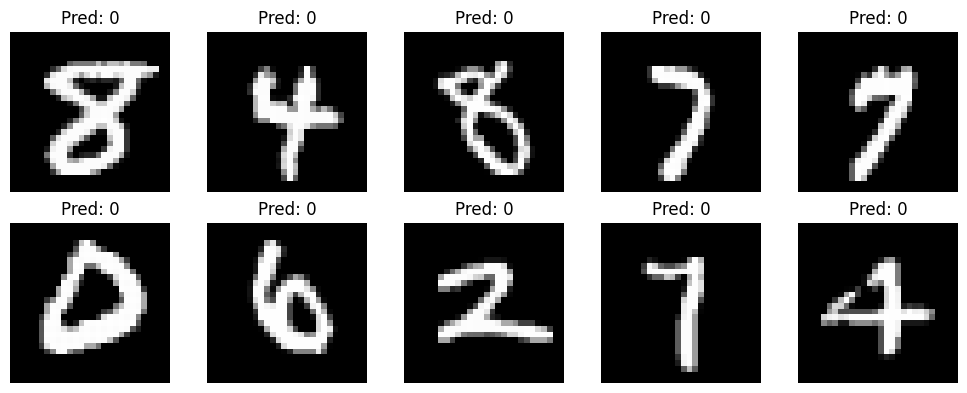

In [8]:
!pip install tqdm

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from tqdm import tqdm

# Custom Decision Tree Implementation (simplified)
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def predict(self, X):
        predictions = [self._traverse_tree(x, self.tree) for x in X]
        return np.array(predictions)

    def _build_tree(self, X, y, depth):
        # Base case: If all labels are the same or max_depth reached
        if len(set(y)) == 1 or (self.max_depth is not None and depth >= self.max_depth):
            return {'class': y[0]}  # Leaf node

        # Find best split
        best_feature, best_threshold = self._find_best_split(X, y)

        # Create node
        node = {'feature': best_feature, 'threshold': best_threshold, 'left': None, 'right': None}

        # Split data
        left_indices = X[:, best_feature] <= best_threshold
        right_indices = ~left_indices

        # Recursively build subtrees
        node['left'] = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        node['right'] = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return node

    def _find_best_split(self, X, y):
        # Simplified split finding (using Gini impurity)
        best_gini = float('inf')
        best_feature, best_threshold = None, None

        for feature in tqdm(range(X.shape[1]), desc="Finding best split"): # Added tqdm here
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] <= threshold
                right_indices = ~left_indices

                gini = self._gini_impurity(y[left_indices]) + self._gini_impurity(y[right_indices])

                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def _gini_impurity(self, y):
        if len(y) == 0:
            return 0

        # Fix: Handle cases with only one unique class
        if len(np.unique(y)) == 1:
            return 0

        proportions = np.bincount(y) / len(y)
        return 1 - np.sum(proportions**2)

    def _traverse_tree(self, x, node):
        if 'class' in node:
            return node['class']
        if x[node['feature']] <= node['threshold']:
            return self._traverse_tree(x, node['left'])
        else:
            return self._traverse_tree(x, node['right'])

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)  # Load as numpy array
X, y = mnist.data, mnist.target.astype(int)  # Convert labels to integers

# Split data into training and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Flatten images from 28x28 to 784
X_train_full = X_train_full.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# Normalize pixel values to 0-1
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

# Use a smaller subset to speed up training (optional, Decision Trees can be slow)
X_train, _, y_train, _ = train_test_split(X_train_full, y_train_full, train_size=10000, stratify=y_train_full, random_state=42)

# Create the Decision Tree classifier
clf = DecisionTree(max_depth=5)  # Using custom DecisionTree class with max_depth for control

# Train the classifier
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize some predictions
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()